In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [3]:
airline = pd.read_csv("EastWestAirlines1.csv")

In [4]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
df_norm = norm_func(airline.iloc[:,1:])

In [10]:
df_norm.iloc[:,:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


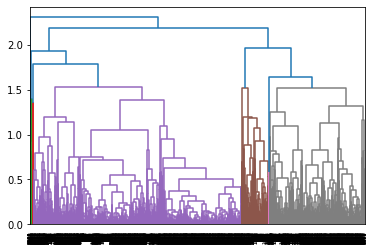

In [12]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [15]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [16]:
hc.fit_predict(df_norm)

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [17]:
y_hc = hc.fit_predict(df_norm)

In [18]:
df_norm['h_clusterid'] = y_hc 

In [19]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [22]:
airline['h_clusterid'] = y_hc 

In [23]:
airline.groupby(["h_clusterid"])["Balance"].apply(lambda x:tuple(x))

h_clusterid
0    (28143, 19244, 41354, 14776, 16420, 84914, 400...
1    (97752, 96522, 28495, 51890, 120576, 123759, 1...
2    (20856, 443003, 104860, 13958, 91473, 23354, 1...
3                       (53232, 287033, 160114, 27619)
4    (8669, 167670, 55610, 44824, 84856, 16103, 491...
Name: Balance, dtype: object

In [24]:
airline = pd.read_csv("EastWestAirlines1.csv")

In [25]:
from sklearn.cluster import KMeans

In [26]:
model_kmeans = KMeans(n_clusters=5) 
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [27]:
model_kmeans.labels_

array([4, 4, 4, ..., 1, 4, 4])

In [28]:
md=pd.Series(model_kmeans.labels_)

In [29]:
airline["labels"]=pd.Series(model_kmeans.labels_)

In [30]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [32]:
airline.groupby(["labels"])["Balance"].apply(lambda x:tuple(x))

labels
0    (84914, 177926, 276571, 121260, 75971, 38077, ...
1    (20856, 443003, 104860, 13958, 91473, 23354, 1...
2    (97752, 96522, 28495, 51890, 120576, 123759, 1...
3    (8669, 167670, 55610, 44824, 84856, 16103, 491...
4    (28143, 19244, 41354, 14776, 16420, 40091, 433...
Name: Balance, dtype: object

In [49]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [50]:
airline = pd.read_csv("EastWestAirlines1.csv")

In [51]:
df=airline.iloc[:,1:]

In [52]:
df.values

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [53]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [54]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [55]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [56]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [57]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [58]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [60]:
air = pd.read_csv("EastWestAirlines1.csv")

In [61]:
air.sample(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
2226,2244,13543,0,1,1,1,1443,7,423,2,3811,1
480,486,38716,0,2,1,1,8253,21,0,0,8114,0
1497,1512,137402,0,1,1,1,950,6,200,3,4685,1
1196,1208,14739,0,1,1,1,1800,4,800,3,5332,1
1044,1055,5195,0,1,1,1,33050,3,50,1,5755,1
3840,3863,16079,0,1,1,1,6085,4,0,0,1670,0
3604,3627,12964,500,1,1,1,450,3,350,2,943,0
56,57,75971,0,4,1,1,34339,14,0,0,6869,0
2925,2947,169546,0,5,1,1,68315,24,600,2,1761,0
718,728,60976,0,5,1,1,97318,31,7000,14,6282,1


In [65]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(air.iloc[:,:])
    iner.append(km.inertia_)

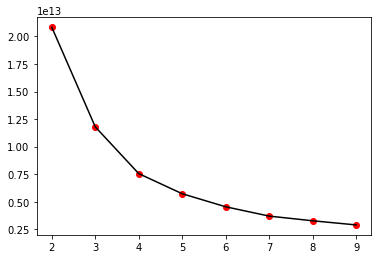

In [66]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [67]:
from sklearn.metrics import silhouette_score as sil

In [68]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(air.iloc[:,:4])
    sc_score.append(sil(air.iloc[:,:4],y))

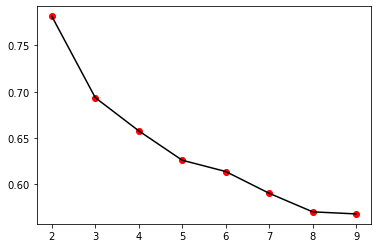

In [69]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [76]:
# The optimal number of cluster is 3 as found from Elbow_score and from silhouette_score is 2 